In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold


In [2]:
# Učitavanje podataka
data = pd.read_csv(r"C:\Users\mceka\Desktop\Wa-vjezbe\Data-Science\data\taxi_zone_lookup.csv")


In [3]:
# 1. Formulacija problema
problem_statement = "Analiza i kategorizacija taksi zona u New Yorku."
analysis_goals = "1. Razumjeti distribuciju zona.\n2. Analizirati povezanost između različitih karakteristika zona."
print(problem_statement)
print(analysis_goals)


Analiza i kategorizacija taksi zona u New Yorku.
1. Razumjeti distribuciju zona.
2. Analizirati povezanost između različitih karakteristika zona.


In [4]:
# Opis dataset-a
dataset_description = "Dataset Taxi Zone Lookup sadrži informacije o ID-jevima zona, pripadajućim okruzima i uslužnim zonama. Podaci dolaze s NYC Open Data platforme i koriste se za analizu taksi usluga."
print(dataset_description)

Dataset Taxi Zone Lookup sadrži informacije o ID-jevima zona, pripadajućim okruzima i uslužnim zonama. Podaci dolaze s NYC Open Data platforme i koriste se za analizu taksi usluga.


In [5]:
# 2. Analiza i čišćenje podataka
# Prikaz osnovnih informacija o datasetu
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


,LocationID
count,265.000000
mean,133.000000
std,76.643112
min,1.000000
25%,67.000000
50%,133.000000
75%,199.000000
max,265.000000


In [6]:
# Uklanjanje nedostajućih podataka
data.dropna(inplace=True)

In [7]:
# Skaliranje podataka
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['LocationID']])

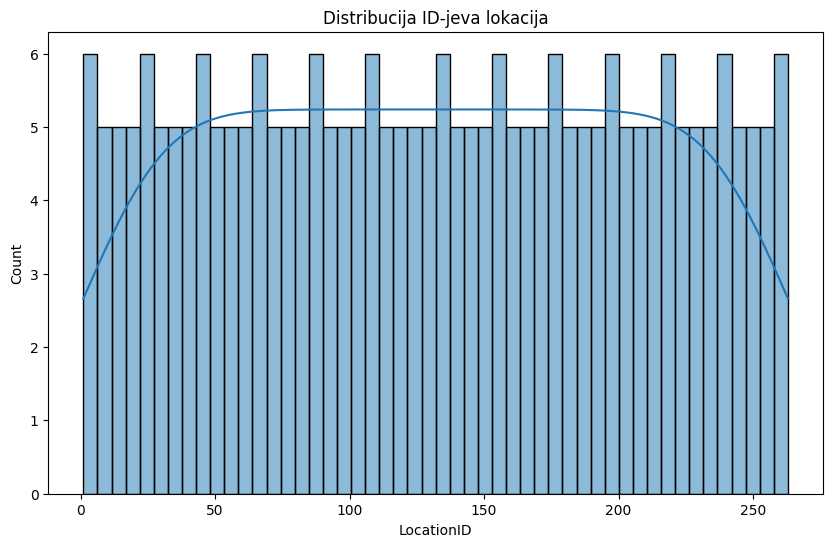

In [8]:
# Eksploratorna analiza podataka
plt.figure(figsize=(10,6))
sns.histplot(data['LocationID'], bins=50, kde=True)
plt.title("Distribucija ID-jeva lokacija")
plt.show()

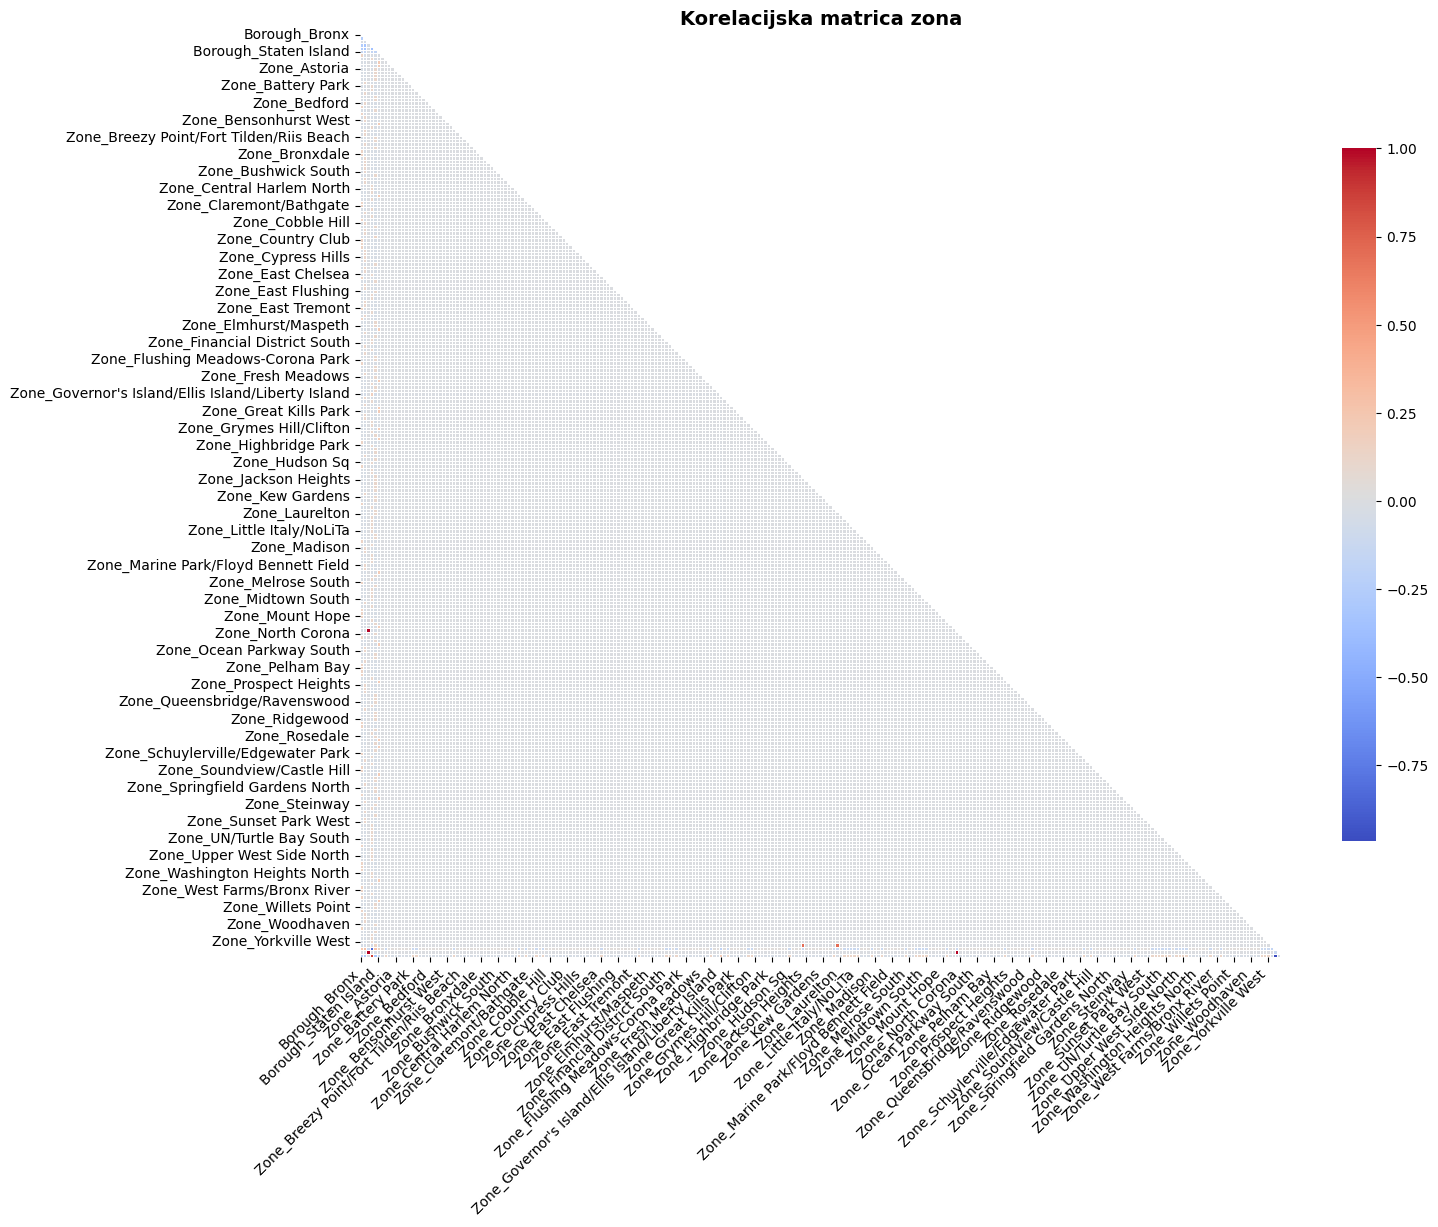

In [24]:
# Korelacije - poboljšani prikaz
plt.figure(figsize=(15, 12))

# Izračunavanje korelacijske matrice
corr_matrix = pd.get_dummies(data[['Borough', 'Zone', 'service_zone']]).corr()

# Postavljanje maske za prikaz samo donjeg dijela matrice
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Postavljanje heatmape s poboljšanim fontovima i bojama
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5, square=True,
            cbar_kws={"shrink": 0.75})

# Poboljšavanje pregleda oznaka
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title("Korelacijska matrica zona", fontsize=14, fontweight='bold')
plt.show()


C:\Users\mceka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mceka\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


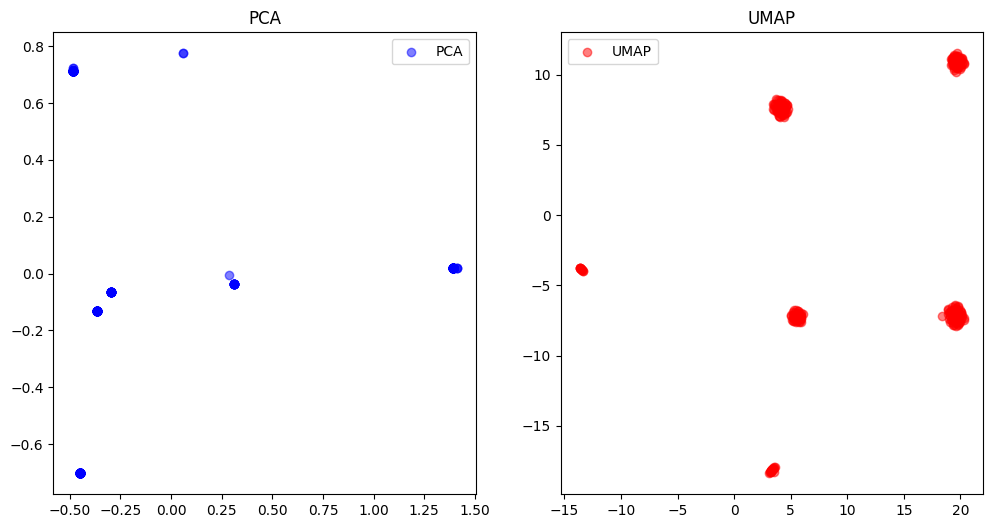

In [15]:
# Priprema podataka za dimenzionalnost
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(pd.get_dummies(data[['Borough', 'Zone', 'service_zone']]))

# Dimenzionalnost - PCA i UMAP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(data_scaled)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5, c='blue', label='PCA')
plt.title("PCA")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(umap_result[:,0], umap_result[:,1], alpha=0.5, c='red', label='UMAP')
plt.title("UMAP")
plt.legend()

plt.show()


In [ ]:
# Hipoteze
# H0: Ne postoji značajna razlika između zona u različitim okruzima
# H1: Postoji značajna razlika
stat, p_value = stats.ttest_ind(data[data['Borough'] == 'Manhattan']['LocationID'],
                                data[data['Borough'] == 'Brooklyn']['LocationID'])
print("P-vrijednost testa:", p_value)

if p_value < 0.05:
    print("Odbacujemo H0: Postoji značajna razlika između zona u različitim okruzima.")
else:
    print("Ne možemo odbaciti H0: Nema značajne razlike između zona u različitim okruzima.")


In [ ]:
# 3. Odabir modela
# Feature Engineering
for i in range(10):
    data[f'new_feature_{i}'] = data['LocationID'] * (i+1)

print("Dodane nove značajke")


In [11]:
# Modeli
potential_models = ["K-Means Clustering", "Hierarchical Clustering", "DBSCAN"]
print("Mogući modeli:", potential_models)

Mogući modeli: ['K-Means Clustering', 'Hierarchical Clustering', 'DBSCAN']


In [12]:
# Metoda validacije modela
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print("Koristit ćemo k-fold cross-validation (k=5) za procjenu performansi modela.")

Koristit ćemo k-fold cross-validation (k=5) za procjenu performansi modela.


In [13]:
# Justifikacija odabranih metoda
justification = "Odabrani modeli su prikladni za grupiranje geografskih podataka. K-Means se koristi za jasne klastere, Hierarchical Clustering omogućava analizu hijerarhijskih odnosa, dok je DBSCAN robustan na šum i prepoznaje nepravilne klastere."
print(justification)


Odabrani modeli su prikladni za grupiranje geografskih podataka. K-Means se koristi za jasne klastere, Hierarchical Clustering omogućava analizu hijerarhijskih odnosa, dok je DBSCAN robustan na šum i prepoznaje nepravilne klastere.
